In [1]:
# import sys
# reload(sys)
# sys.setdefaultencoding("utf-8")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
paths = [
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2003',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2004',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2005',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2006',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2007',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2008',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2009',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2010',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2011',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2012',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2013',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2014',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2015',
    'https://raw.githubusercontent.com/ericfischer/housing-inventory/master/craigslist-2016']

# list of paths where our data is located

In [3]:
import requests
listings = []
for i in paths:
    listings.append(requests.get(i).text)   # create listings from raw data

In [4]:
rentals_pre2012 = {}   # create the pre2012 data
a = 2003
for rents in listings:    #iterate through each year up until 2012
    if a == 2012:
        break
    rents = rents.split('\n')   #split on new line, separate listings
    rentals_pre2012[a] = []
    for rent in rents:
        rent = rent.lstrip()
        rent = rent.rstrip()
        if rent.startswith('$') == True:
            rentals_pre2012[a].append(rent)
    a = a + 1    # create listings for every year
    
for i in rentals_pre2012:
    print i, 'count:', len(rentals_pre2012[i])
    
    # count how many listings with a dollar sign in the listings for pre 2012

2003 count: 497
2004 count: 6434
2005 count: 15456
2006 count: 4530
2007 count: 890
2008 count: 487
2009 count: 195
2010 count: 99
2011 count: 1486


In [7]:
# count how many listings with a dollar sign in the listings for post 2012
a = 2012
rentals_post2012 = {}
for rents in listings[9:]:
    rents = rents.split('\n')
    rentals_post2012[a] = []
    for rent in rents:
        rent = rent.lstrip()
        rent = rent.rstrip()
        if '$' in rent:
            rentals_post2012[a].append(rent)
    a = a + 1

for i in rentals_post2012:
    print i, 'count:', len(rentals_post2012[i])

2016 count: 2499
2012 count: 2289
2013 count: 782
2014 count: 2230
2015 count: 2035


In [8]:
year = []
post = []
for yr in rentals_pre2012:
    print yr
    for i in rentals_pre2012[yr]:
        year.append(yr)
        post.append(i.lower())
for yr in rentals_post2012:
    print yr
    for i in rentals_post2012[yr]:
        year.append(yr)
        post.append(i.lower())

2003
2004
2005
2006
2007
2008
2009
2010
2011
2016
2012
2013
2014
2015


In [9]:
posts = pd.DataFrame({'year':year,'post':post})

In [10]:
posts.head()

,post,year
0,$950 / 1br - sunny one bedroom for rent (sunse...,2003
1,$1500 / 2br - 1 ba cow hollow ***open house th...,2003
2,$1795 / 2br - spacious & completely remodeled ...,2003
3,$1180 / 0br - victorian hotel room w/private b...,2003
4,$1100 / 1br - great landlord-great tenats (inn...,2003


In [11]:
import re
posts['price'] = posts.post.apply(lambda x: (re.findall('\${1}[,0-9]{1,10}',x)))

In [12]:
posts['bed'] = posts.post.apply(lambda x: re.findall('[,0-9]br',x))

In [13]:
posts.price

0                [$950]
1               [$1500]
2               [$1795]
3               [$1180]
4               [$1100]
5               [$1851]
6               [$2100]
7               [$1550]
8               [$2495]
9               [$1995]
10              [$1700]
11               [$900]
12              [$1895]
13              [$1695]
14               [$975]
15              [$2350]
16              [$1600]
17               [$950]
18               [$825]
19              [$2800]
20              [$1050]
21              [$1395]
22              [$1400]
23              [$1450]
24              [$1150]
25              [$1350]
26              [$2650]
27              [$1050]
28              [$1450]
29              [$2250]
              ...      
39879           [$4850]
39880           [$1600]
39881           [$4000]
39882           [$1925]
39883           [$4967]
39884          [$10800]
39885           [$3750]
39886           [$2800]
39887           [$2395]
39888           [$2950]
39889           

In [14]:
# run once
def un_nest(nested):
    for i in nested:
        return i

posts.price = posts.price.apply(lambda x: un_nest(x))

In [15]:
posts.price = posts.price.apply(lambda x: str(x).replace('$',''))
posts.price = posts.price.apply(lambda x: str(x).replace(',',''))                          
posts.price = posts.price.apply(lambda x: float(x) if x != 'None' else np.nan)

In [16]:
# run once
def un_nest(nested):
    for i in nested:
        for i in i:
            return i
posts.bed = posts.bed.apply(lambda x: un_nest(x))
posts.bed = posts.bed.apply(lambda x: 0 if x == None or x == ',' else x)
posts.bed = posts.bed.apply(lambda x: int(x))

In [1]:
posts.head()

NameError: name 'posts' is not defined

In [18]:
#remove alpha numeric characters from the description
posts.post = posts.post.apply(lambda x: x.encode('UTF8'))

            
posts.post = posts.post.apply(lambda x: re.sub(r'([^\s\w]|_)+', '', str(x)))

In [19]:
posts.post.head()

0    950  1br  sunny one bedroom for rent sunset  p...
1    1500  2br  1 ba cow hollow open house thursday...
2    1795  2br  spacious  completely remodeled 2 bd...
3    1180  0br  victorian hotel room wprivate bath ...
4    1100  1br  great landlordgreat tenats inner ri...
Name: post, dtype: object

In [20]:
# -*- coding: utf-8 -*-
import Levenshtein

from nltk.util import ngrams

districts_set = ['inner richmond','lower nob hill','inner' 'japantown', 'glen park', 'western addition', 'outer richmond', 'inner sunset', 
'financial district', 'south beach', 'oceanview', 'merced', 'ingleside', 'presidio heights', 'bernal heights', 'golden gate park', 
'south of market','portola', 'potrero hill', 'treasure island', 'pacific heights', 'hayes valley', 'excelsior', 'visitacion valley', 'mission bay', 
 'castro', 'upper market', 'sunset', 'parkside', 'mclaren park', 'nob hill', 'lakeshore', 'west of twin peaks', 'chinatown', 'noe valley', 
 'north beach', 'marina', 'haight ashbury', 'lincoln park', 'bayview hunters point', 'seacliff', 'lone mountain', 'usf', 'presidio', 'mission', 
 'tenderloin', 'russian hill', 'outer mission', 'twin peaks','mission district','downtown','usf','panhandle','UCSF','SOMA','lower haight','panhandle'
  'SFSU']


def district_match(source):
    
    candidates = []
    
    for district in districts_set:
        
        gram_length = len(district.split())
        ratio_threashold = .5
        
        if gram_length > 1:
            grams = ngrams(source.split(), gram_length)

            for gram in grams:
                gram_combined =  str(" ".join(gram))
                ratio = Levenshtein.ratio(district, gram_combined)
                
                if ratio > ratio_threashold:
#                     print "Target word: %s, matches district: %s, ngram-len: %d, score: %f" % (gram_combined, district, gram_length, ratio)
                    candidates.append((ratio, district))
                
        else:
            
            for word in source.split():
            
                ratio = Levenshtein.ratio(district, str(word))
                
                if ratio > ratio_threashold:
#                     print "Target word: %s, matches district: %s " % (word, district)
                    candidates.append((ratio, district))
                else:
                    _ = ""
#                     print word, "doesn't match.. .6 ratio is:", ratio
                
    return sorted(candidates)[::-1]



In [21]:
# create data matches


district1 = []
district2 = []
district3 = []
post_descrip = []
counter_yes_match = 0
counter_no_match = 0
for post in posts.post:


    matches = district_match(post.encode('utf8'))
    if len(matches) > 1:   # if the length of matches is > 1
        #print "------------"
        #print post

        if (matches[0][1]) in post:  
            _ = ''
            # print post
            # print matches[0][1]
            counter_yes_match = counter_yes_match + 1


            post = post.lower()
            district1.append(matches[0][1])   #append district
            district2.append(matches[1][1])
            try: district3.append(matches[2][1])
            except:
                district3.append(np.nan)
                continue
        else:
            counter_no_match = counter_no_match + 1
            district1.append(np.nan)
            district2.append(np.nan)
            district3.append(np.nan)
    else:
        district1.append(np.nan)
        district2.append(np.nan)
        district3.append(np.nan)
        


print a
print 'how many matched:' , counter_yes_match
print 'mismatch:' , counter_no_match

2017
how many matched: 35680
mismatch: 3847


In [22]:
print len(district1) , len(district2), len(district3)

39909 39909 39909


In [23]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39909 entries, 0 to 39908
Data columns (total 4 columns):
post     39909 non-null object
year     39909 non-null int64
price    39833 non-null float64
bed      39909 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [24]:
posts['district1'] = district1
posts['district2'] = district2
posts['district3'] = district3

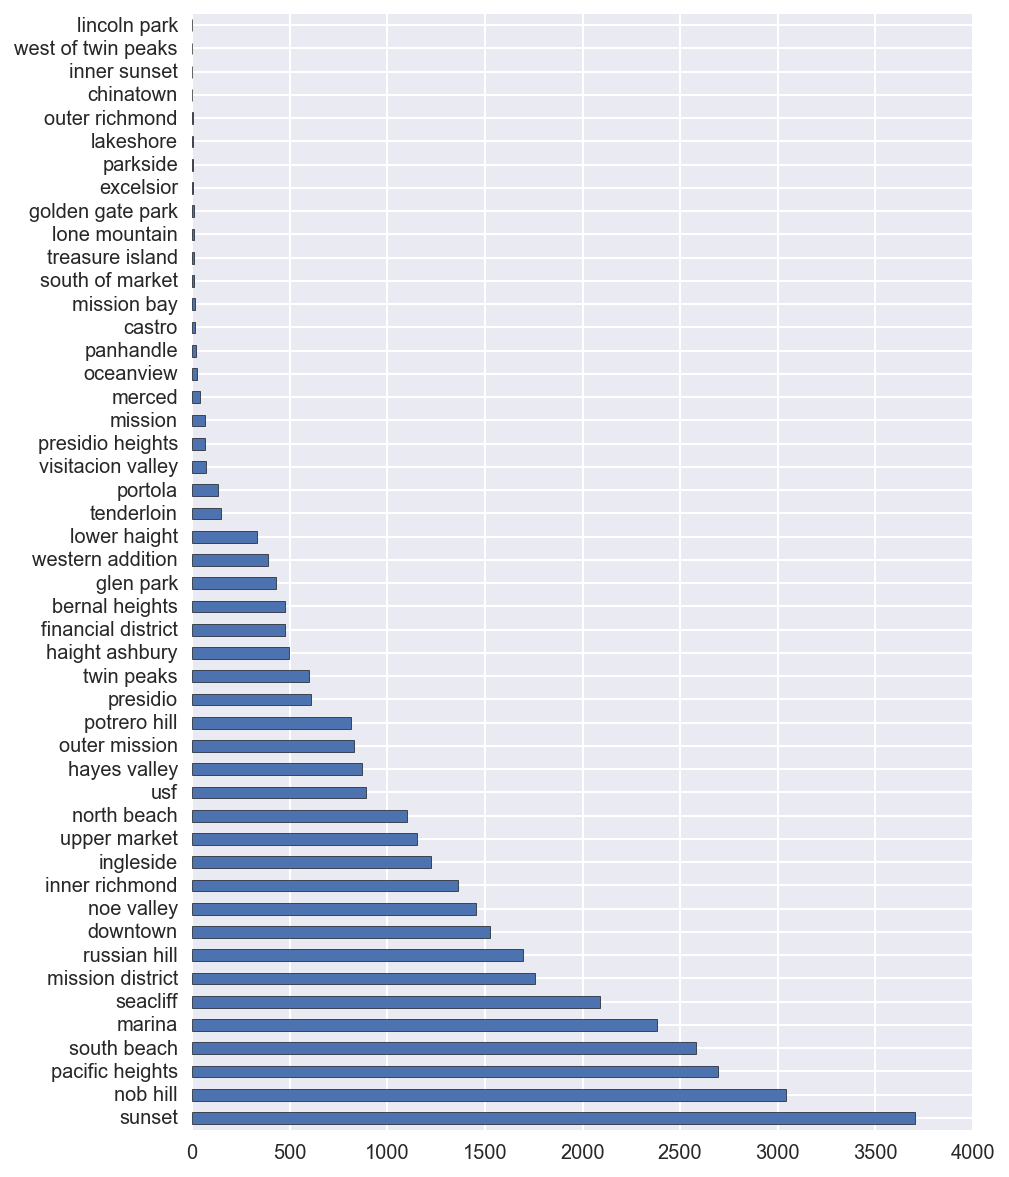

In [25]:
sns.set(rc={"figure.figsize": (7, 10)})
posts.district1.value_counts().plot(kind='barh')

In [26]:
post

'aug 13 1 bedroom 1 bath high rise apartment  available today 2920  1br  ingleside  sfsu  ccsf pic map x'

In [27]:
posts

,post,year,price,bed,district1,district2,district3
0,950 1br sunny one bedroom for rent sunset p...,2003,950.0,1,sunset,parkside,inner sunset
1,1500 2br 1 ba cow hollow open house thursday...,2003,1500.0,2,marina,nob hill,nob hill
2,1795 2br spacious completely remodeled 2 bd...,2003,1795.0,2,hayes valley,noe valley,visitacion valley
3,1180 0br victorian hotel room wprivate bath ...,2003,1180.0,0,pacific heights,presidio heights,inner richmond
4,1100 1br great landlordgreat tenats inner ri...,2003,1100.0,1,inner richmond,outer richmond,inner sunset
5,1851 3br eduardian flat 2 fpl sec pkg nu hdw...,2003,1851.0,3,NaN,NaN,NaN
6,2100 2br spacious 2br1ba hdwd flrs bay windo...,2003,2100.0,2,russian hill,russian hill,nob hill
7,1550 2br inner sunset 9th ave 2br1ba near th...,2003,1550.0,2,sunset,sunset,inner sunset
8,2495 3br newly remodeled top floor apt wview...,2003,2495.0,3,hayes valley,noe valley,oceanview
9,1995 3br great pricetrendy 16thvalencia loca...,2003,1995.0,3,mission district,mission,outer mission


In [28]:
posts[posts.district1.isnull() == False].year.value_counts()

2005    13849
2004     5846
2006     4091
2016     2182
2012     2019
2014     1929
2015     1751
2011     1339
2007      805
2013      704
2003      455
2008      443
2009      180
2010       87
Name: year, dtype: int64

In [29]:
posts.price.apply(lambda x: np.nan if x == 0 else x)

0          950.0
1         1500.0
2         1795.0
3         1180.0
4         1100.0
5         1851.0
6         2100.0
7         1550.0
8         2495.0
9         1995.0
10        1700.0
11         900.0
12        1895.0
13        1695.0
14         975.0
15        2350.0
16        1600.0
17         950.0
18         825.0
19        2800.0
20        1050.0
21        1395.0
22        1400.0
23        1450.0
24        1150.0
25        1350.0
26        2650.0
27        1050.0
28        1450.0
29        2250.0
          ...   
39879     4850.0
39880     1600.0
39881     4000.0
39882     1925.0
39883     4967.0
39884    10800.0
39885     3750.0
39886     2800.0
39887     2395.0
39888     2950.0
39889     3156.0
39890     4000.0
39891     2095.0
39892     2825.0
39893     6000.0
39894     2900.0
39895     4250.0
39896     8000.0
39897     2275.0
39898     3300.0
39899     3400.0
39900     4750.0
39901     6759.0
39902     3795.0
39903     4495.0
39904     1695.0
39905     1750.0
39906     3900

In [30]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39909 entries, 0 to 39908
Data columns (total 7 columns):
post         39909 non-null object
year         39909 non-null int64
price        39833 non-null float64
bed          39909 non-null int64
district1    35680 non-null object
district2    35680 non-null object
district3    35474 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 2.1+ MB


In [28]:
posts.bed.value_counts()

1    13521
2    12516
0     7541
3     4815
4     1202
5      257
6       33
7       22
8        2
Name: bed, dtype: int64

In [29]:
posts.post[20]

'1050  1br  spacious sunny sunset apt photos sunset  parkside'

In [30]:
train = pd.read_csv('./train.csv')

In [31]:
posts.district1 = posts.district1.apply(lambda x:'mission district' if x == 'mission' else x)
posts.district2 = posts.district2.apply(lambda x:'mission district' if x == 'mission' else x)

In [32]:
sorted(posts[posts.district1.isnull() == False].district1.unique())

['bernal heights',
 'castro',
 'chinatown',
 'downtown',
 'excelsior',
 'financial district',
 'glen park',
 'golden gate park',
 'haight ashbury',
 'hayes valley',
 'ingleside',
 'inner richmond',
 'inner sunset',
 'lakeshore',
 'lincoln park',
 'lone mountain',
 'lower haight',
 'marina',
 'merced',
 'mission bay',
 'mission district',
 'nob hill',
 'noe valley',
 'north beach',
 'oceanview',
 'outer mission',
 'outer richmond',
 'pacific heights',
 'panhandle',
 'parkside',
 'portola',
 'potrero hill',
 'presidio',
 'presidio heights',
 'russian hill',
 'seacliff',
 'south beach',
 'south of market',
 'sunset',
 'tenderloin',
 'treasure island',
 'twin peaks',
 'upper market',
 'usf',
 'visitacion valley',
 'west of twin peaks',
 'western addition']

In [44]:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
district_unique = sorted(posts[posts.district1.isnull() == False].district1.unique())
district_coordinates = []
for dist in district_unique:
    dist = str(dist)
    path = 'https://www.google.com/search?q=sf+%s+coordinates' % dist.replace(' ','+')
    print path
    response = requests.get(path)
    HTML = response.text
    district_coord = (Selector(text=HTML).xpath("//div[@class='g']/div/span[@class='_m3b']/text()").extract())
    district_coordinates.append(district_coord)
    

https://www.google.com/search?q=sf+bernal+heights+coordinates
https://www.google.com/search?q=sf+castro+coordinates
https://www.google.com/search?q=sf+chinatown+coordinates
https://www.google.com/search?q=sf+downtown+coordinates
https://www.google.com/search?q=sf+excelsior+coordinates
https://www.google.com/search?q=sf+financial+district+coordinates
https://www.google.com/search?q=sf+glen+park+coordinates
https://www.google.com/search?q=sf+golden+gate+park+coordinates
https://www.google.com/search?q=sf+haight+ashbury+coordinates
https://www.google.com/search?q=sf+hayes+valley+coordinates
https://www.google.com/search?q=sf+ingleside+coordinates
https://www.google.com/search?q=sf+inner+richmond+coordinates
https://www.google.com/search?q=sf+inner+sunset+coordinates
https://www.google.com/search?q=sf+lakeshore+coordinates
https://www.google.com/search?q=sf+lincoln+park+coordinates
https://www.google.com/search?q=sf+lone+mountain+coordinates
https://www.google.com/search?q=sf+lower+haight+

In [45]:
len(district_coordinates)

47

In [48]:
lat = []
lon = []
tmp = []
for i,d in zip(district_coordinates,district_unique):
    if d == 'marina':
        lat.append(37.8037) 
        lon.append(-122.4368)
    elif d == 'south beach':
        lat.append(37.7836)
        lon.append(-122.3899)
    elif d == "west of twin peaks":
        lat.append(37.4506)
        lon.append(-122.2652)
    elif d == "mission bay":
        lat.append(37.7731) 
        lon.append(122.3929)
    else:
        try: 

            i = str(i)

            n = i.replace('\\xb0','')
            n = n.split()
            lon_str = n[2]
            lat_str = n[0].replace('[','')
            lat_str = lat_str.replace("u\'",'')
            print lat_str,':' ,lon_str
            lat.append(float(lat_str))
            lon.append(float(lon_str)*-1)

        except:
            lat.append(np.nan)
            lon.append(np.nan)
            print 'ha'


37.7412 : 122.4178
37.7609 : 122.4350
37.7941 : 122.4078
ha
37.7244 : 122.4272
37.7946 : 122.3999
37.7378 : 122.4321
37.7694 : 122.4862
37.7692 : 122.4481
37.7759 : 122.4245
37.7198 : 122.4538
37.7799 : 122.4647
37.7607 : 122.4680
37.7233 : 122.4887
37.7828 : 122.5116
ha
37.7721 : 122.4312
ha
37.7599 : 122.4148
ha
37.7502 : 122.4337
37.8061 : 122.4103
37.7142 : 122.4566
37.7157 : 122.4458
37.7777 : 122.4953
37.7925 : 122.4382
37.7727 : 122.4447
37.7330 : 122.4786
37.7297 : 122.4099
37.7605 : 122.4009
37.7989 : 122.4662
ha
37.8011 : 122.4196
37.7859 : 122.4907
37.7785 : 122.4056
37.7467 : 122.4863
37.7847 : 122.4145
37.8236 : 122.3706
37.7522 : 122.4474
ha
37.7766 : 122.4506
37.7172 : 122.4043
37.7822 : 122.4342


In [49]:
coor_districts_df = pd.DataFrame({'district':district_unique, 'lat': lat, 'lon':lon})
coor_districts_df.info()
coor_districts_df

coor_districts_df.to_csv('./district_coordinates.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
district    47 non-null object
lat         41 non-null float64
lon         41 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [40]:
len(lon)

47

In [33]:
posts.to_csv('./craigslist_posts.csv')

In [42]:
# coor_districts_df = pd.DataFrame({'district':district_unique, 'lat': lat, 'lon':lon})
# coor_districts_df.info()
# coor_districts_df

coor_districts_df.to_csv('./district_coordinates.csv')


In [38]:
coor_districts_dict = {'bernal heights': "u'37.7412 N, 122.4178 W'",
 'castro': "u'37.7609 N, 122.4350 W'",
 'chinatown': "u'37.7941 N, 122.4078 W'",
 'excelsior': "u'37.7244 N, 122.4272 W'",
 'financial district': "u'37.7946 N, 122.3999 W'",
 'glen park': "u'37.7378 N, 122.4321 W'",
 'golden gate park': "u'37.7694 N, 122.4862 W'",
 'haight ashbury': "u'37.7692 N, 122.4481 W'",
 'hayes valley': "u'37.7759 N, 122.4245 W'",
 'ingleside': "u'37.7198 N, 122.4538 W'",
 'inner richmond': "u'37.7799 N, 122.4647 W'",
 'inner sunset': "u'37.7607 N, 122.4680 W'",
 'lakeshore': "u'37.7233 N, 122.4887 W'",
 'lincoln park': "u'37.7828 N, 122.5116 W'",
 'lower haight': "u'37.7721 N, 122.4312 W'",
 'marina': "u'37.8037 N, 122.4368 W'",
 'merced': '37.7183 N, 122.4810 W',
 'mission bay': "u'37.7731 N, 122.3929 W'",
 'mission district': "u'37.7599 N, 122.4148 W'",
 'nob hill': "u'37.7930 N, 122.4161 W'",
 'noe valley': "u'37.7502 N, 122.4337 W'",
 'north beach': "u'37.8061 N, 122.4103 W'",
 'oceanview': "u'37.7142 N, 122.4566 W'",
 'outer mission': "u'37.7157 N, 122.4458 W'",
 'outer richmond': "u'37.7777 N, 122.4953 W'",
 'pacific heights': "u'37.7925 N, 122.4382 W'",
 'panhandle': "u'37.7727 N, 122.4447 W'",
 'parkside': "u'37.7330 N, 122.4786 W'",
 'portola': "u'37.7297 N, 122.4099 W'",
 'potrero hill': "u'37.7605 N, 122.4009 W'",
 'presidio': "u'37.7989 N, 122.4662 W'",
 'presidio heights': '',
 'russian hill': "u'37.8011 N, 122.4196 W'",
 'seacliff': "u'37.7859 N, 122.4907 W'",
 'south beach': "u'37.7836 N, 122.3899 W'",
 'south of market': "u'37.7785 N, 122.4056 W'",
 'sunset': "u'37.7467 N, 122.4863 W'",
 'tenderloin': "u'37.7847 N, 122.4145 W'",
 'treasure island': "u'37.8236 N, 122.3706 W'",
 'twin peaks': "u'37.7522 N, 122.4474 W'",
 'usf': "u'37.7764 N, 122.4501 W'",
 'visitacion valley': "u'37.7172 N, 122.4043 W'",
 'west of twin peaks': u"'37.4506 N 122.2652 W'",
 'western addition': "u'37.7822 N, 122.4342 W'"}

In [42]:

for i in coor_districts_dict:
    print i,coor_districts_dict[i]

seacliff u'37.7859 N, 122.4907 W'
inner richmond u'37.7799 N, 122.4647 W'
merced 37.7183 N, 122.4810 W
tenderloin u'37.7847 N, 122.4145 W'
lincoln park u'37.7828 N, 122.5116 W'
chinatown u'37.7941 N, 122.4078 W'
usf u'37.7764 N, 122.4501 W'
treasure island u'37.8236 N, 122.3706 W'
russian hill u'37.8011 N, 122.4196 W'
presidio u'37.7989 N, 122.4662 W'
south beach u'37.7836 N, 122.3899 W'
lakeshore u'37.7233 N, 122.4887 W'
glen park u'37.7378 N, 122.4321 W'
western addition u'37.7822 N, 122.4342 W'
oceanview u'37.7142 N, 122.4566 W'
presidio heights 
south of market u'37.7785 N, 122.4056 W'
west of twin peaks '37.4506 N 122.2652 W'
castro u'37.7609 N, 122.4350 W'
outer mission u'37.7157 N, 122.4458 W'
financial district u'37.7946 N, 122.3999 W'
mission bay u'37.7731 N, 122.3929 W'
noe valley u'37.7502 N, 122.4337 W'
north beach u'37.8061 N, 122.4103 W'
outer richmond u'37.7777 N, 122.4953 W'
haight ashbury u'37.7692 N, 122.4481 W'
portola u'37.7297 N, 122.4099 W'
hayes valley u'37.7759 

In [38]:
coor_districts_df

,district,lat,lon
0,bernal heights,37.7412,-122.4178
1,castro,37.7609,-122.4350
2,chinatown,37.7941,-122.4078
3,downtown,NaN,NaN
4,excelsior,37.7244,-122.4272
5,financial district,37.7946,-122.3999
6,glen park,37.7378,-122.4321
7,golden gate park,37.7694,-122.4862
8,haight ashbury,37.7692,-122.4481
9,hayes valley,37.7759,-122.4245


In [2]:
pd.DataFrame(posts.groupby(['district1','year','bed']).price.median())

NameError: name 'pd' is not defined

In [41]:
# are there certain ways that houses are described thats related to crimes, and do crimes affect the way that places are described
# how presence air bnb affects the prices in neighborhoods


In [42]:
crime = pd.read_csv('./train.csv')

In [49]:
#pd.read_csv('/Users/Stav/Downloads/listings 2.csv').info()

In [1]:
import json

with open('/Users/Stav/Downloads/planning_neighborhoods.geojson') as f:
    data = json.load(f)
geom_polys = {"area" : geom}
for feature,neighborhood in zip(data['features'],neighbors.neighborhoods):
    geom = feature['geometry']['coordinates']
    geom_polys[neighborhood] = geom

IOError: [Errno 2] No such file or directory: '/Users/Stav/Downloads/planning_neighborhoods.geojson'

In [50]:
!pip install folium
#https://github.com/python-visualization/folium

You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:

neighbors = pd.read_csv('./neighbors.csv')
del neighbors['Unnamed: 0']
neighbors.columns = ['polygon','neighborhoods']

neighbors

,polygon,neighborhoods
0,MULTIPOLYGON (((-122.48408901116126 37.7879103...,Seacliff
1,MULTIPOLYGON (((-122.43596394723758 37.7690383...,Haight Ashbury
2,MULTIPOLYGON (((-122.45428355309251 37.7082221...,Outer Mission
3,MULTIPOLYGON (((-122.45143577030224 37.7587350...,Inner Sunset
4,MULTIPOLYGON (((-122.40891233260967 37.7901316...,Downtown/Civic Center
5,MULTIPOLYGON (((-122.43552692247039 37.7414599...,Diamond Heights
6,MULTIPOLYGON (((-122.47105088778372 37.7081978...,Lakeshore
7,MULTIPOLYGON (((-122.42095167789303 37.8089665...,Russian Hill
8,MULTIPOLYGON (((-122.42557791995739 37.7566167...,Noe Valley
9,MULTIPOLYGON (((-122.37313296650942 37.8322533...,Treasure Island/YBI


In [5]:
import folium
from folium import plugins
map_osm = folium.Map(location=[37.7599,-122.431297],tiles='stamen toner', zoom_start = 12)
map_osm.create_map(path='osm.html')
map_osm

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [50]:
crime = pd.read_csv('./SFPD_Incidents_-_from_1_January_2003.csv')

In [51]:
crime_sub = crime.sample(1000)

In [52]:
crime_sub.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
451195,110865269,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,10/26/2011,18:49,MISSION,NONE,2000 Block of MARKET ST,-122.426956,37.769247,"(37.769247063207, -122.426955631709)",11086526962050
1295066,80581951,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Saturday,05/24/2008,18:00,SOUTHERN,NONE,600 Block of NATOMA ST,-122.411118,37.777561,"(37.7775607137405, -122.411118243435)",8058195106301
774724,70174328,ASSAULT,BATTERY,Saturday,02/17/2007,04:30,PARK,"ARREST, BOOKED",DIVISADERO ST / GEARY BL,-122.439481,37.783309,"(37.7833088100846, -122.439480772242)",7017432804134
1389878,130244518,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,03/24/2013,18:15,SOUTHERN,NONE,5TH ST / MARKET ST,-122.408068,37.783992,"(37.7839916768161, -122.408068345148)",13024451862050
1467671,110447544,KIDNAPPING,FALSE IMPRISONMENT,Friday,06/03/2011,01:30,TARAVAL,"ARREST, BOOKED",2200 Block of 45TH AV,-122.503677,37.744606,"(37.7446058160434, -122.503676555746)",11044754426142


In [37]:
import folium
from folium import plugins
map_osm = folium.Map(location=[37.7599,-122.431297],tiles='stamen toner', zoom_start = 12)

map_osm.geo_json('./planning_neighborhoods.geojson', fill_color='none',line_color='red',line_weight=3)
map_osm.create_map(path='osm.html')
map_osm

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [64]:
!pip install geojson

You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [303]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [311]:
!pip install haversine

  Running setup.py bdist_wheel for haversine ... - \ done
  Stored in directory: /Users/Stav/Library/Caches/pip/wheels/be/a3/4e/2e073dc725bf9b430e2d42931c55e5be2be4cdc6e325e17677
Successfully built haversine
You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


SyntaxError: invalid syntax (<ipython-input-70-05d33bbb1453>, line 5)

In [ ]:
http://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/GeoJSON%20and%20choropleth.ipynb